In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Users/Mojtabaei/Downloads/china_gdp.csv')
df.head(10)

   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
5  1965  6.970915e+10
6  1966  7.587943e+10
7  1967  7.205703e+10
8  1968  6.999350e+10
9  1969  7.871882e+10


In [6]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


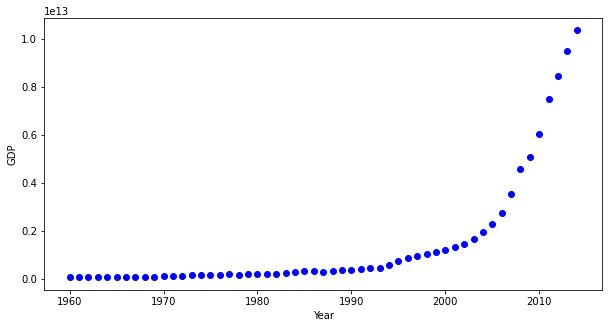

In [29]:
plt.figure(figsize=(10,5))
x_data, y_data = (df['Year'].values), (df['Value'].values)
plt.plot(x_data, y_data, 'bo')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

Text(0.5, 0, 'Independent Variable')

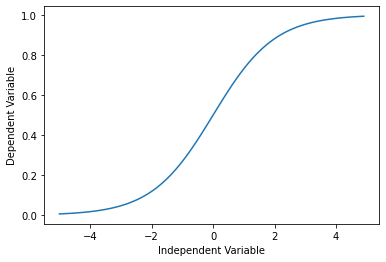

In [35]:
X = np.arange(-5, 5, 0.1)
Y = 1 /(1+ np.exp(-x))
plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

In [37]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

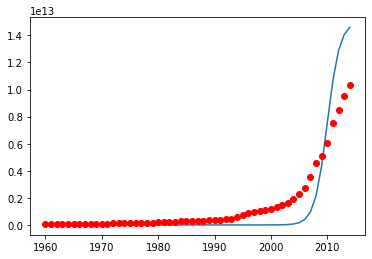

In [51]:
beta_1 = 0.9
beta_2 = 2010
y_pred = sigmoid(x_data, beta_1, beta_2)
plt.plot(x_data, y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

In [53]:
x_normalized = x_data/max(x_data)
y_normalized = y_data/max(y_data)

In [57]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_normalized, y_normalized)
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.451712, beta_2 = 0.997207


Text(0.5, 0, 'Year')

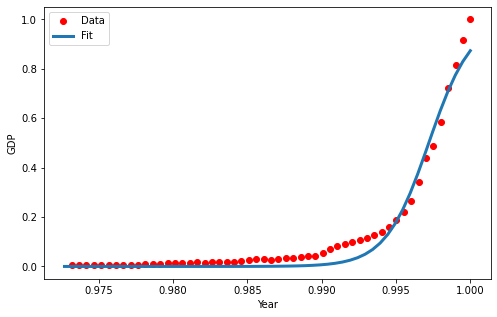

In [70]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1])
plt.plot(x_normalized, y_normalized, 'ro', label='Data')
plt.plot(x, y, linewidth = 3, label ='Fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')

In [76]:
from sklearn.metrics import r2_score
print('R2 score: %.2f'% r2_score(y, y_normalized))

R2 score: 0.97
